<a href="https://colab.research.google.com/github/Ribeirotmr/Iniciacao-Cientifica/blob/main/IC__Deutsch_Parte2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install qiskit -U
!pip install qiskit_aer
!pip install qiskit-ibm-runtime
!pip install --upgrade qiskit

import qiskit
qiskit.__version__

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 19.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 119.4/119.4 kB 5.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 10.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.7/49.7 kB 1.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.7/49.7 MB 6.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 108.5/108.5 kB 4.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 37.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 31.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 343.3/343.3 kB 18.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.4/64.4 kB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 130.5/130.5 kB 6.7 MB/s eta 0:00:00


'1.2.2'

In [ ]:
!pip install matplotlib
!pip install pylatexenc

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.6/162.6 kB 3.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pylatexenc: filename=pylatexenc-2.10-py3-none-any.whl size=136817 sha256=443a004bd22d8cb3949b10732501fc52e6d7853f43bada88983d3adba9a827ce
  Stored in directory: /root/.cache/pip/wheels/d3/31/8b/e09b0386afd80cfc556c00408c9aeea5c35c4d484a9c762fd5
Successfully built pylatexenc


In [ ]:
# Qiskit: métodos básicos

from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister

from qiskit import transpile

from qiskit.visualization import plot_histogram, array_to_latex, plot_state_city

In [ ]:
# Acesso à IBM

from qiskit_ibm_runtime import QiskitRuntimeService

IBMToken_Thierry = "SUA CHAVE DE ACESSO"
QiskitRuntimeService.save_account(
channel = 'ibm_quantum',
token = IBMToken_Thierry,
overwrite=True
)

# Processadores disponíveis

service = QiskitRuntimeService()
print("Backends disponíveis:")
display(service.backends())

# Backend
service = QiskitRuntimeService(channel="ibm_quantum")

'''
Backend com menor número de jobs em execução
'''
backend = service.least_busy(operational=True, simulator=False)

'''
Backend personalizado
'''
#backend = service.backend(name="ibm_brisbane")

print("Backend:")
display(backend.name)

Backends disponíveis:


[<IBMBackend('ibm_brisbane')>,
 <IBMBackend('ibm_kyiv')>,
 <IBMBackend('ibm_sherbrooke')>]

Backend:


'ibm_brisbane'

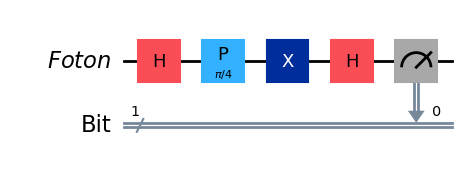

In [ ]:
'''
Interqerômetro de Mach-Zehnder
https://edisciplinas.usp.br/pluginfile.php/7654961/mod_resource/content/1/CFQ6a-02.pdf
'''

#lembrar depois da biblioteca

import numpy as np
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister #execute
from qiskit_aer import Aer  # Importar Aer corretamente do qiskit_aer
from qiskit.visualization import plot_histogram
from numpy import pi

#Criação de registradores quanticos.
q = QuantumRegister(1, name='Foton')
c = ClassicalRegister(1, name='Bit')

qc = QuantumCircuit(q,c) #craição do circuito.

qc.h(q[0])  #aplicação da porta hadamard no primeiro qeixe para divir o qeixe, ou em termos quanticos um qoton.


#deixar pi/4 depois ir trocando para pi,pi/2,2pi,3pi/2 e etc, para ver como se comporta o qeixe
qc.p(pi/4, q[0])  #aplicação das portas de qase

qc.x(q[0])

qc.h(q[0]) #Aplicação da porta hadamar no segundo qoton apos ser dividido

qc.measure(q[0],c[0]) #medição do resultado


qc.draw('mpl') #desenhar teste



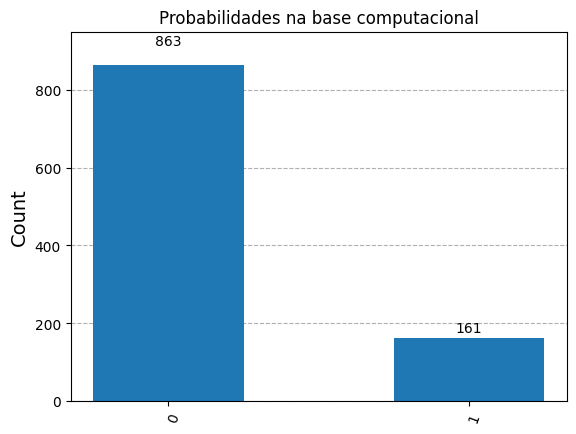

In [ ]:
'''
Simulação clássica do circuito
'''

from qiskit_aer import AerSimulator

# Simulador
simulator = AerSimulator()

# Transpilação
qc_t = transpile(qc, simulator)

# Simulação
result = simulator.run(qc_t, shots = 2**10).result()

# Plotagem do histograma das estatísticas
counts = result.get_counts(qc_t)
plot_histogram(counts, title='Probabilidades na base computacional')

Backend: <IBMBackend('ibm_sherbrooke')>


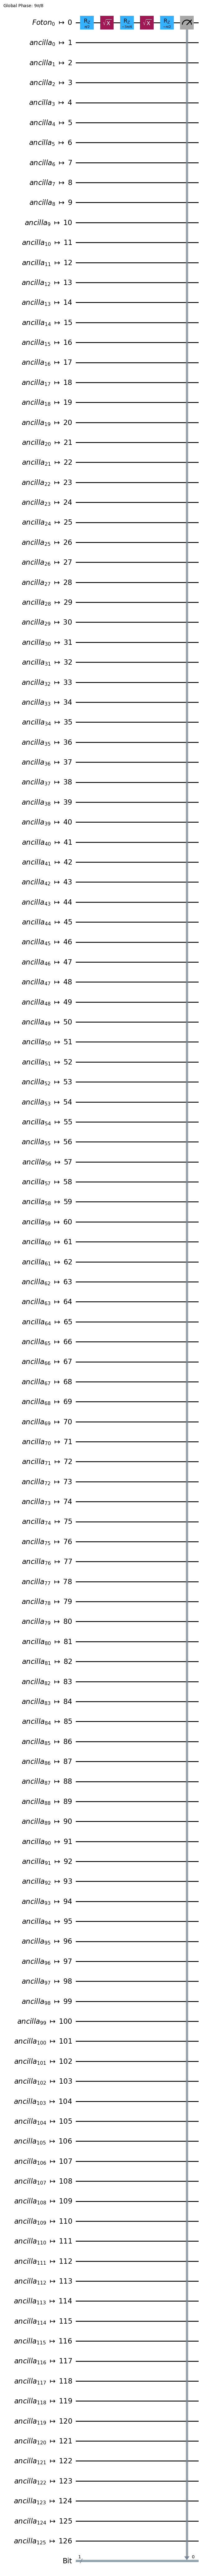

In [ ]:
'''
Simulação Quântica
'''

# Backend

backend = service.backend(name="ibm_sherbrooke")
print(f"Backend: {backend}")

# Transpilação
from qiskit import transpile
qc_t = transpile(qc, backend=backend, optimization_level=1, basis_gates=backend.configuration().basis_gates)
display(qc_t.draw('mpl'))

# Simulação
from qiskit_ibm_runtime import SamplerV2 as Sampler
sampler = Sampler(mode=backend)
sampler.options.dynamical_decoupling.enable = True
sampler.options.dynamical_decoupling.sequence_type = "XY4"

In [ ]:
# Ordem para execução da simulação no chip quântico da IBM

job = sampler.run([qc_t])
print(job.job_id())

cvypb6mkpn400082kwxg


In [ ]:
job.status()

'QUEUED'

In [ ]:
job_id = "cvypb6mkpn400082kwxg"
job = service.job(job_id)

job.result()#[0]

In [ ]:
# Extract counts from the quasi-distribution for the first circuit
count = job.result()[0].data.Bit.get_counts()  # Handle the case where 'counts' might be missing
count

KeyboardInterrupt: 

Shots= 4096
Probabilidades:
P(0) = 0.851806640625, P(1) = 0.148193359375
Histograma dos resultados:


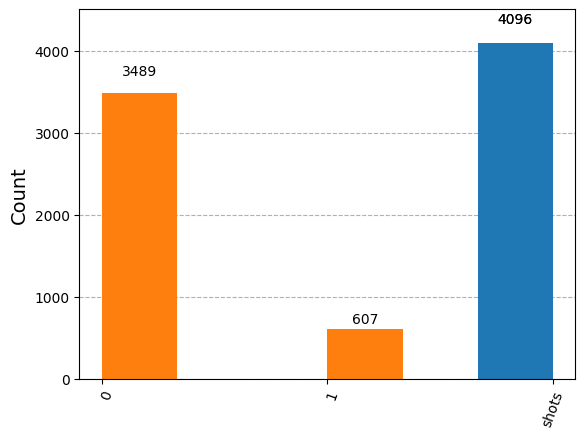

Histograma das probabilidades:


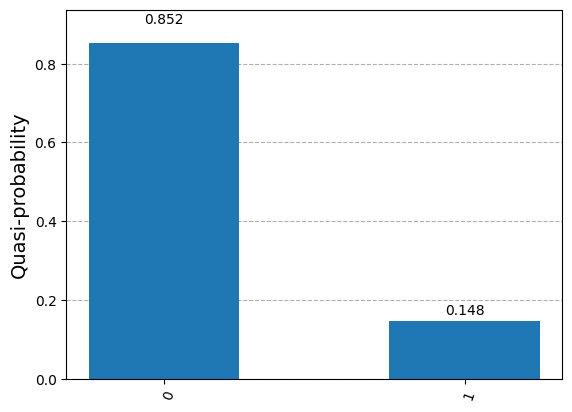

In [ ]:
# Plotagem das estatísticas
shots = count['0'] + count['1']
print(f"Shots= {shots}")
print("Probabilidades:")
print(f"P(0) = {count['0']/shots}, P(1) = {count['1']/shots}")

# Plotagem do  histograma dos resultados
from qiskit.visualization import plot_histogram
Shots = {'shots': shots}
print("Histograma dos resultados:")
display(plot_histogram([Shots, count]))
print("Histograma das probabilidades:")
probabilidade = {'0': count['0']/shots, '1': count['1']/shots}
plot_histogram(probabilidade)


# Algoritmo de Deutsch

O problema que o Algoritmo de Deutsch resolve é o de determinar se uma função de {0,1} em {0,1} é constante ou não-constante (balanceada).

$$
f: \left\lbrace 0,1 \right\rbrace \rightarrow \left\lbrace 0,1 \right\rbrace
$$

Para construir e executar o algoritmo, precisamos de uma implementação quântica de $f$, que em geral tem a seguinte forma:

$$
U_f : | x \rangle | y \rangle = | x \rangle | y \oplus f(x) \rangle
$$

O operador do circuito de Deutsch é dado po:

$$
\textbf{O} := (H_0 I_1)U_f(H_0 H_1)(X_0X_1) = (H \otimes I)U_f(H \otimes H)(X\otimes X)
$$

A ação do operador $\textbf{O}$ no estado inicial da base computacional $ | 0 \rangle | 0 \rangle$:

$$
\begin{split}
 \textbf{O} | 0 \rangle | 0 \rangle &= (H \otimes I)U_f(H \otimes H)(X\otimes X) | 0 \rangle | 0 \rangle\\
 &= (H \otimes I)U_f(H \otimes H) | 1 \rangle | 1 \rangle\\
 &= \frac{1}{2}(H \otimes I)U_f(| 0 \rangle - | 1 \rangle) (| 0 \rangle  - | 1 \rangle)\\
 &= \frac{1}{2}(H \otimes I)U_f(| 0\rangle | 0 \rangle - | 0\rangle |1 \rangle - | 1\rangle |0 \rangle  + | 1\rangle |1 \rangle)\\
 &= \frac{1}{2}(H \otimes I)(| 0\rangle | 0 \oplus f(0) \rangle - | 0\rangle |1\oplus f(0)  \rangle - | 1\rangle |0 \oplus f(1)  \rangle  + | 1\rangle |1 \oplus f(1) \rangle)\\
 &= \frac{1}{2\sqrt{2}}\left\lbrack (| 0\rangle + |1\rangle)| 0 \oplus f(0) \rangle - (| 0\rangle + |1\rangle) |1\oplus f(0)  \rangle - (| 0\rangle - |1\rangle) |0 \oplus f(1)  \rangle  +(| 0\rangle - |1\rangle) |1 \oplus f(1) \rangle \right\rbrack \\
 &= \frac{1}{2\sqrt{2}}\left\lbrack \ | 0\rangle( | 0 \oplus f(0) \rangle -  |1\oplus f(0)  \rangle -  |0 \oplus f(1)  \rangle  +|1 \oplus f(1) \rangle ) + \right. \\
 &\ \ \ \ \ \ \ \ \ \ \ + \left. |1\rangle (| 0 \oplus f(0) \rangle - |1\oplus f(0)  \rangle + |0 \oplus f(1)  \rangle  - |1 \oplus f(1) \rangle )\right\rbrack.\\
  &= \left\lbrace
  \begin{array}{ll}
  \frac{(-1)^{f(0)}}{\sqrt{2}}|1\rangle (| 0 \rangle - |1 \rangle) &, \text{caso}\ f\ \text{constante};\\
  \frac{(-1)^{f(0)}}{\sqrt{2}}|0\rangle (| 0 \rangle - |1 \rangle) &, \text{caso}\ f\ \text{balanceada}.
  \end{array}
  \right.
 \end{split}
$$

Para programar o algoritmo Deutsch, falta apenas construir as implementações da função $f$.

*   **Caso 1**: $f$ constante igual a $0$:  $f(0) = 0,\ f(1)=0$.

Nesse caso, $U_f$ atua como a identidade:
$$
U_f = I \otimes I.
$$

*   **Caso 2**: $f$ constante igual a $1$: $f(0) = 1,\ f(1)=1$.

Nesse caso, $U_f$ atua como a porta $X$ (NOT) no segundo qubit:
$$
U_f = I \otimes X.
$$

*   **Caso 3**: $f$ balanceada (identidade): $f(0) = 0,\ f(1)=1$.

Nesse caso, $U_f$ atua no segundo qubit como a porta $X$ controlada pelo primeiro qubit (CNOT):
$$
U_f = X^{0\rightarrow 1}_1.
$$

*   **Caso 4**: $f$ balanceada: $f(0) = 1,\ f(1)=0$.

Nesse caso, $U_f$ atua no segundo qubit como a porta $X$ controlada pelo primeiro qubit (CNOT), com o acionamento definido pelo valor $0$:
$$
U_f = X^{0\rightarrow 1}_0.
$$
